In [6]:
from datetime import datetime
import pandas as pd
import numpy as np

In [7]:
now=datetime.now()
now

datetime.datetime(2020, 3, 29, 14, 4, 12, 531935)

In [8]:
now.day,now.month,now.year

(29, 3, 2020)

In [9]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [10]:
delta.days

926

In [11]:
from datetime import timedelta

In [12]:
start=datetime(2011,1,7)
start+timedelta(12)
# days are increased by 12 days

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [14]:
stamp=datetime(2011,1,3)
str(stamp),stamp.strftime('%Y-%m-%d')

('2011-01-03 00:00:00', '2011-01-03')

In [15]:
value='2011-01-03'
datetime.strptime(value,'%Y-%m-%d')
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse

In [17]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('Jan 31 1997 10:45 AM')

datetime.datetime(1997, 1, 31, 10, 45)

In [20]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [21]:
parse('6-12-2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [22]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
parse(datestrs[0]),parse(datestrs[1])

(datetime.datetime(2011, 7, 6, 12, 0), datetime.datetime(2011, 8, 6, 0, 0))

In [23]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [24]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [25]:
idx[2]

NaT

In [26]:
pd.isnull(idx)

array([False, False,  True])

In [27]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
    datetime(2011, 1, 7), datetime(2011, 1, 8),
    datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02    0.167650
2011-01-05    0.272162
2011-01-07   -0.050429
2011-01-08   -0.429538
2011-01-10   -2.901008
2011-01-12   -0.999157
dtype: float64

In [28]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
ts.values,ts.keys()

(array([ 0.16764985,  0.27216159, -0.05042864, -0.42953824, -2.90100813,
        -0.99915723]),
 DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
                '2011-01-10', '2011-01-12'],
               dtype='datetime64[ns]', freq=None))

In [30]:
ts+ts[::2]

2011-01-02    0.335300
2011-01-05         NaN
2011-01-07   -0.100857
2011-01-08         NaN
2011-01-10   -5.802016
2011-01-12         NaN
dtype: float64

In [31]:
ts.index.dtype

dtype('<M8[ns]')


# Indexing,selection,subsetting

In [32]:
stamp=ts.index[2]
stamp,ts[stamp]

(Timestamp('2011-01-07 00:00:00'), -0.05042863530769267)

In [33]:
ts['1/10/2011']

-2.901008133536901

In [34]:
longer_ts=pd.Series(np.random.randn(1000),
                    index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -0.965063
2000-01-02   -1.781379
2000-01-03   -0.564698
2000-01-04   -1.766714
2000-01-05   -1.040124
                ...   
2002-09-22   -0.173096
2002-09-23   -0.528359
2002-09-24    0.606241
2002-09-25   -0.259567
2002-09-26   -0.555931
Freq: D, Length: 1000, dtype: float64

In [35]:
longer_ts.index.min(),longer_ts.index.max()

(Timestamp('2000-01-01 00:00:00', freq='D'),
 Timestamp('2002-09-26 00:00:00', freq='D'))

In [39]:
longer_ts['2001']

2001-01-01    0.916420
2001-01-02    0.527867
2001-01-03    1.671681
2001-01-04    0.835566
2001-01-05   -0.564210
                ...   
2001-12-27   -1.031816
2001-12-28    0.297667
2001-12-29   -0.176710
2001-12-30   -0.342794
2001-12-31   -0.061201
Freq: D, Length: 365, dtype: float64

In [40]:
longer_ts['2001-05']

2001-05-01    1.401413
2001-05-02   -2.349606
2001-05-03    0.297430
2001-05-04   -0.269436
2001-05-05    1.283157
2001-05-06   -0.591907
2001-05-07   -0.324922
2001-05-08    0.021619
2001-05-09   -1.544939
2001-05-10    0.782862
2001-05-11   -1.994728
2001-05-12   -0.367609
2001-05-13    0.501124
2001-05-14   -0.643849
2001-05-15   -0.133661
2001-05-16   -1.685787
2001-05-17   -0.057319
2001-05-18   -0.309033
2001-05-19   -1.228388
2001-05-20   -1.249091
2001-05-21   -0.150900
2001-05-22   -0.665812
2001-05-23    0.932086
2001-05-24    0.102964
2001-05-25    0.405635
2001-05-26    0.481026
2001-05-27    0.553393
2001-05-28    0.721859
2001-05-29   -0.204919
2001-05-30    0.944941
2001-05-31   -0.887138
Freq: D, dtype: float64

In [41]:
ts[datetime(2011,1,7):]

2011-01-07   -0.050429
2011-01-08   -0.429538
2011-01-10   -2.901008
2011-01-12   -0.999157
dtype: float64

In [43]:
ts

2011-01-02    0.167650
2011-01-05    0.272162
2011-01-07   -0.050429
2011-01-08   -0.429538
2011-01-10   -2.901008
2011-01-12   -0.999157
dtype: float64

In [44]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.050429
2011-01-08   -0.429538
2011-01-10   -2.901008
dtype: float64

In [47]:
ts.truncate(after='1/9/2011')

2011-01-02    0.167650
2011-01-05    0.272162
2011-01-07   -0.050429
2011-01-08   -0.429538
dtype: float64

In [48]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
index=dates,
columns=['Colorado', 'Texas',
'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.143741,-1.598281,-0.944082,0.326481
2000-01-12,1.739612,-0.478387,-0.098045,-0.019144
2000-01-19,-0.363895,-0.666048,-0.576018,1.051055
2000-01-26,0.512628,-0.046744,-1.636300,-0.994045
2000-02-02,1.091536,-0.496024,0.633631,0.286281
...,...,...,...,...
2001-10-31,1.388894,0.032446,1.056344,-0.162440
2001-11-07,1.207734,0.781258,-0.067920,0.260123
2001-11-14,-0.001725,-2.119139,0.935162,1.725579
2001-11-21,0.418072,0.757533,-0.579306,1.594578


In [63]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
        '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [64]:
dup_ts.is_unique

True

In [65]:
dup_ts['1/3/2000']

4

In [66]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [71]:
grouped=dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [72]:
grouped.count()


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [73]:
resampler=ts.resample('D')
resampler

In [74]:
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [75]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [85]:
pd.date_range('2012-05-02 12:56:31',periods=5,freq='D')

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [86]:
from pandas.tseries.offsets import Hour, Minute

In [88]:
hour=Hour()
hour

<Hour>

In [90]:
Hour(4)

<4 * Hours>

In [91]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [94]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [95]:
pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [96]:
ts=pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31   -0.327227
2000-02-29    1.488304
2000-03-31   -1.162659
2000-04-30    1.666016
Freq: M, dtype: float64

In [104]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.327227
2000-04-30    1.488304
Freq: M, dtype: float64

In [105]:
ts.shift(-2)

2000-01-31   -1.162659
2000-02-29    1.666016
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [114]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -5.548230
2000-03-31   -1.781198
2000-04-30   -2.432936
Freq: M, dtype: float64

In [115]:
ts.shift(2,freq='M')

2000-03-31   -0.327227
2000-04-30    1.488304
2000-05-31   -1.162659
2000-06-30    1.666016
Freq: M, dtype: float64

In [117]:
ts.shift(3,freq='D')

2000-02-03   -0.327227
2000-03-03    1.488304
2000-04-03   -1.162659
2000-05-03    1.666016
dtype: float64

In [118]:
from pandas.tseries.offsets import Day,MonthEnd
now=datetime(2011,11,17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [119]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [120]:
offset=MonthEnd()

In [121]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [122]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [123]:
ts = pd.Series(np.random.randn(20),
    index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.816187
2000-01-19    0.541840
2000-01-23    1.526712
2000-01-27    0.634457
2000-01-31   -0.852130
2000-02-04   -0.364841
2000-02-08    0.001237
2000-02-12   -1.362924
2000-02-16   -0.413563
2000-02-20    1.097480
2000-02-24   -0.731634
2000-02-28    1.281544
2000-03-03    0.850163
2000-03-07    0.885251
2000-03-11   -0.001451
2000-03-15    0.411847
2000-03-19   -0.568135
2000-03-23    0.366236
2000-03-27   -0.169891
2000-03-31    0.257742
Freq: 4D, dtype: float64

In [124]:
ts.groupby(offset.rollforward).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001A440B09DC8>>

In [125]:
ts.resample('M').mean()

2000-01-31    0.206938
2000-02-29   -0.070386
2000-03-31    0.253970
Freq: M, dtype: float64

# Time Zone Handling

In [126]:
import pytz

In [129]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [131]:
tz=pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [132]:
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [181]:
close_px_all=pd.read_csv('stock.csv',parse_dates=True,index_col=0)
close_px_all.head(4)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93


In [142]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [144]:
close_px=close_px.resample('B').ffill()
import matplotlib.pyplot as pl
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


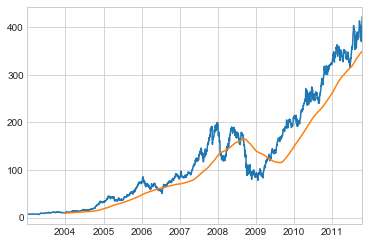

In [149]:
pl.style.use('seaborn-whitegrid')
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

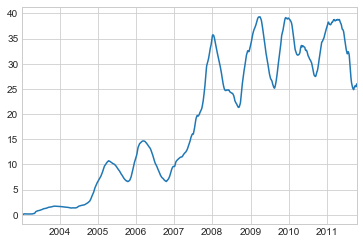

In [150]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250.plot()

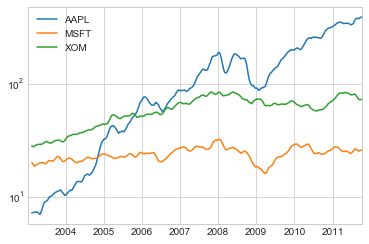

In [165]:
close_px.rolling(30).mean().plot(logy=True)

In [166]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


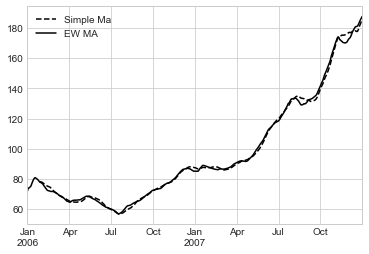

In [170]:
appl_px=close_px.AAPL['2006':'2007']
ma60=appl_px.rolling(30,min_periods=20).mean()
ewma60=appl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple Ma')
ewma60.plot(style='k-',label='EW MA')
pl.legend()

In [184]:
spx_px=close_px_all['SPX']
spx_rets=spx_px.pct_change()
returns=close_px.pct_change()

In [187]:
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

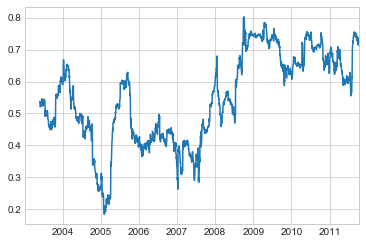

In [188]:
corr.plot()